# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import requests
import json
from citipy import citipy
from api_keys import weather_api_key
import os

## Generate Cities List

In [2]:
x_axis=np.random.randint(-90, 90, size=10000)
y_axis=np.random.randint(-180, 180, size=10000)


cities=[]
names=[]
coordinates=[]
for i in range(10000):
    coordinates.append((x_axis[i], y_axis[i]))
    city=citipy.nearest_city(x_axis[i], y_axis[i])
    country_code = city.country_code
    naming = city.city_name
    names.append(naming)
    name_series=pd.Series(names)
    if len(name_series.unique())==600:
        break


In [3]:
name_series=name_series.drop_duplicates()
name_series=name_series.reset_index(drop=True)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cit_name=[]
lat = []
lon = []
cloudiness = []
max_temp = []
humidity = []
wind_speed = []
country = []
weather=[]
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
for x in range(len(name_series)):
    try:
        print(f"Processing city: {x} of {len(name_series)}: {name_series[x]}")
        response=requests.get(url + "appid=" + weather_api_key + "&q=" + name_series[x] + "&units=" + units).json()
        #data=response.json()
        cit_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        if len(lat)==500:
            break
        #weather.append(data)
    except KeyError:
        print('city could not be processed')
       


Processing city: 0 of 600: manzil salim
Processing city: 1 of 600: kapaa
Processing city: 2 of 600: airai
Processing city: 3 of 600: ushuaia
Processing city: 4 of 600: souillac
Processing city: 5 of 600: sabang
Processing city: 6 of 600: georgetown
Processing city: 7 of 600: kazalinsk
city could not be processed
Processing city: 8 of 600: itarema
Processing city: 9 of 600: illoqqortoormiut
city could not be processed
Processing city: 10 of 600: arraial do cabo
Processing city: 11 of 600: chuy
Processing city: 12 of 600: avarua
Processing city: 13 of 600: mataura
Processing city: 14 of 600: sovetskiy
Processing city: 15 of 600: albany
Processing city: 16 of 600: rostaq
city could not be processed
Processing city: 17 of 600: coihaique
Processing city: 18 of 600: luderitz
Processing city: 19 of 600: taolanaro
city could not be processed
Processing city: 20 of 600: matara
Processing city: 21 of 600: seoul
Processing city: 22 of 600: poronaysk
Processing city: 23 of 600: bilma
Processing ci

Processing city: 204 of 600: baykit
Processing city: 205 of 600: half moon bay
Processing city: 206 of 600: belushya guba
city could not be processed
Processing city: 207 of 600: qaqortoq
Processing city: 208 of 600: goundi
Processing city: 209 of 600: upernavik
Processing city: 210 of 600: lompoc
Processing city: 211 of 600: kruisfontein
Processing city: 212 of 600: alta floresta
Processing city: 213 of 600: petropavlovsk-kamchatskiy
Processing city: 214 of 600: ulladulla
Processing city: 215 of 600: kavaratti
Processing city: 216 of 600: sitka
Processing city: 217 of 600: bozdar
Processing city: 218 of 600: faanui
Processing city: 219 of 600: hermanus
Processing city: 220 of 600: tete
Processing city: 221 of 600: boquira
Processing city: 222 of 600: mormugao
Processing city: 223 of 600: vanimo
Processing city: 224 of 600: avera
Processing city: 225 of 600: qaanaaq
Processing city: 226 of 600: trabzon
Processing city: 227 of 600: felipe carrillo puerto
Processing city: 228 of 600: lor

Processing city: 407 of 600: derzhavinsk
Processing city: 408 of 600: maceio
Processing city: 409 of 600: saint-malo
Processing city: 410 of 600: pingliang
Processing city: 411 of 600: xinyu
Processing city: 412 of 600: imeni poliny osipenko
Processing city: 413 of 600: belmonte
Processing city: 414 of 600: oum hadjer
Processing city: 415 of 600: thinadhoo
Processing city: 416 of 600: santa maria
Processing city: 417 of 600: dudinka
Processing city: 418 of 600: joshimath
Processing city: 419 of 600: attawapiskat
city could not be processed
Processing city: 420 of 600: okitipupa
Processing city: 421 of 600: sokoni
Processing city: 422 of 600: warmbad
Processing city: 423 of 600: ancona
Processing city: 424 of 600: cockburn town
Processing city: 425 of 600: macaboboni
city could not be processed
Processing city: 426 of 600: harrismith
Processing city: 427 of 600: novomykolayivka
Processing city: 428 of 600: richmond
Processing city: 429 of 600: scottsbluff
Processing city: 430 of 600: po

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:

df=pd.DataFrame({"City": cit_name, 'lat': lat, 
                "lon": lon, "Max Temp": max_temp, 
                "Cloudiness": cloudiness, "Humidity": humidity,
                "Wind speed": wind_speed, "Country": country})
df.head()
len(df)

500

In [41]:
csvpath=os.path.join('..', 'output', 'Weather_Data')
df.to_csv(csvpath)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
df['Humidity'].loc[df['Humidity']>100]

Series([], Name: Humidity, dtype: int64)

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

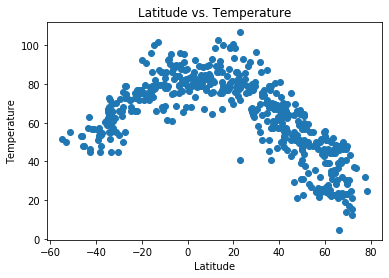

In [9]:
plt.scatter(df['lat'], df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature")
plt.savefig('../output/temp_plot.png')
#this code analyzes the relationship between latitude and maximum temperature by plotting them out from the dataframe.

## Latitude vs. Humidity Plot

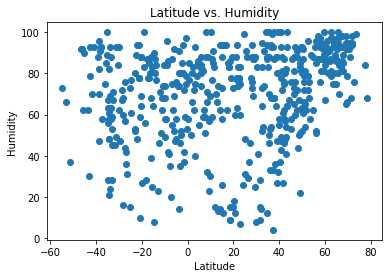

In [10]:
plt.scatter(df['lat'], df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.savefig('../output/humid_plot.png')
#this code analyzes the relationship between latitude and humidity by plotting them out from the dataframe.

## Latitude vs. Cloudiness Plot

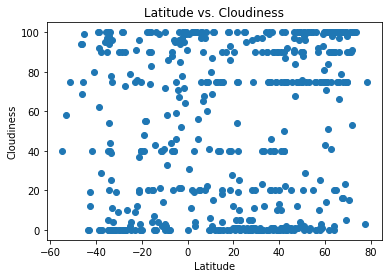

In [11]:
plt.scatter(df['lat'], df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.savefig('../output/cloud_plot.png')
#this code analyzes the relationship between latitude and cloudiness by plotting them out from the dataframe.

## Latitude vs. Wind Speed Plot

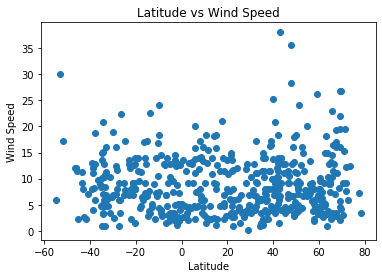

In [12]:
plt.scatter(df['lat'], df['Wind speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.savefig('../output/wind_plot.png')
#this code analyzes the relationship between latitude and wind speed by plotting them out from the dataframe.

## Linear Regression

In [18]:
north=df.loc[df['lat']>0]
north.reset_index(drop=True)
south=df.loc[df['lat']<0]
south.reset_index(drop=True)

,City,lat,lon,Max Temp,Cloudiness,Humidity,Wind speed,Country
0,Airai,-8.93,125.41,61.25,58,96,3.33,TL
1,Ushuaia,-54.80,-68.30,51.80,40,73,5.82,AR
2,Souillac,-20.52,57.52,75.20,40,88,8.05,MU
3,Itarema,-2.92,-39.92,87.62,52,52,13.62,BR
4,Arraial do Cabo,-22.97,-42.03,75.20,75,53,6.93,BR
...,...,...,...,...,...,...,...,...
159,Sola,-13.88,167.55,80.22,100,84,22.59,VU
160,Vila Velha,-20.33,-40.29,75.20,75,64,13.87,BR
161,Christchurch,-43.53,172.63,57.20,0,62,9.17,NZ
162,Kikwit,-5.04,18.82,90.10,46,48,3.40,CD


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(6, 10, 'y = -0.89x + 95.07')

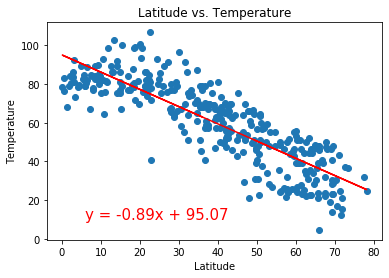

In [23]:

plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature")
plt.scatter(north['lat'], north['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['lat'], north['Max Temp'])
regress_values = north['lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north['lat'] ,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#as latitude increases past zero the max temperature gets lower

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(-30, 60, 'y = 0.77x + 88.23')

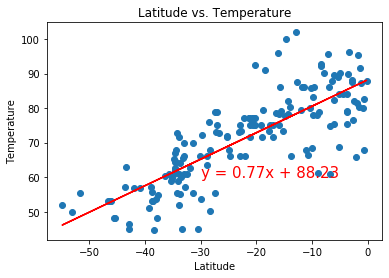

In [25]:
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature")
plt.scatter(south['lat'], south['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['lat'], south['Max Temp'])
regress_values = south['lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south['lat'] ,regress_values, "r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
#as the latitude increases from negative to zero, max temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(45, 10, 'y = 0.36x + 58.28')

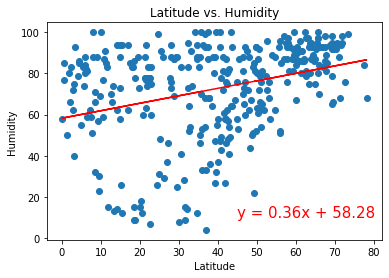

In [29]:
plt.scatter(north['lat'], north['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['lat'], north['Humidity'])
regress_values = north['lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north['lat'] ,regress_values, "r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
#as latitude increases past zero, humidity rises

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(-55, 40, 'y = -0.12x + 62.79')

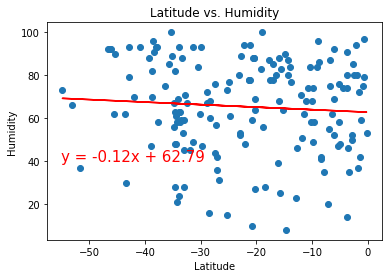

In [33]:
plt.scatter(south['lat'], south['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['lat'], south['Humidity'])
regress_values = south['lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south['lat'] ,regress_values, "r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
#as lat approches zero, humidity gradually decreases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(40, 50, 'y = 0.46x + 34.08')

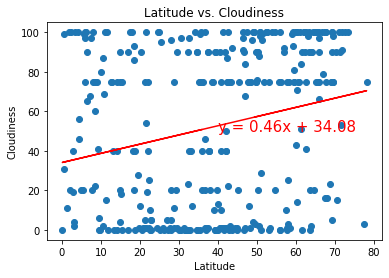

In [35]:
plt.scatter(north['lat'], north['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['lat'], north['Cloudiness'])
regress_values = north['lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north['lat'] ,regress_values, "r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
#as lat increases, cloudiness goes up

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(-30, 60, 'y = 0.38x + 56.72')

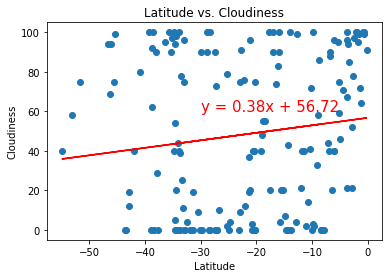

In [36]:
plt.scatter(south['lat'], south['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['lat'], south['Cloudiness'])
regress_values = south['lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south['lat'] ,regress_values, "r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
#as lat increases, cloudiness goes up

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(6, 30, 'y = 0.03x + 7.75')

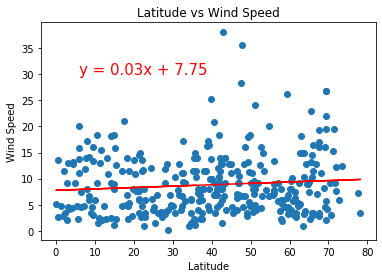

In [38]:
plt.scatter(north['lat'], north['Wind speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['lat'], north['Wind speed'])
regress_values = north['lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north['lat'] ,regress_values, "r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
#as lat increases, wind speed increases slightly

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(-30, 25, 'y = -0.06x + 7.34')

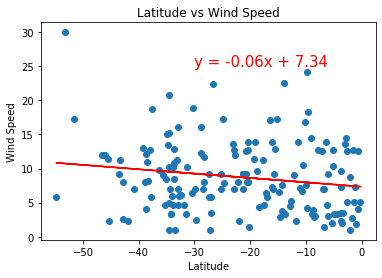

In [40]:
plt.scatter(south['lat'], south['Wind speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['lat'], south['Wind speed'])
regress_values = south['lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south['lat'] ,regress_values, "r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
#as lat increases, wind speed slightly decreases.